<a href="https://colab.research.google.com/github/MargaritaKotova/Tensorflow-2.0-Deep-Learning-and-Artificial-Intelligence-course/blob/master/CNN_for_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 !pip install "tensorflow>=2.0.0"
 import tensorflow as tf
print(tf.__version__)

     |████████████████████████████████| 421.8MB 38kB/s 
     |████████████████████████████████| 450kB 41.2MB/s 
     |████████████████████████████████| 3.9MB 33.2MB/s 
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow-addons~=0.7.0, but you'll have tensorflow-addons 0.8.3 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0
2.1.0


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [3]:
#Load in the data
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()



4423680/4422102 [==============================] - 0s 0us/step


In [7]:
x_train[0][5]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
         0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
        10,   0], dtype=uint8)

In [8]:
x_train, x_test = x_train/255.0, x_test/255.0

print("x_train.shape: ",x_train.shape)

x_train.shape:  (60000, 28, 28)


In [9]:
#the data is only 2D!
#it is ok for feed forward NN, but convolution expects height x width x color
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train.shape: ",x_train.shape)

x_train.shape:  (60000, 28, 28, 1)


In [10]:
#number of classes
K = len(set(y_train))
print("number of classes", K)


number of classes 10


In [0]:
#Build the model using the functional API
i = Input(shape = x_train[0].shape) #(28, 28, 1)
x = Conv2D(32, (3,3), strides =2, activation='relu')(i)
x = Conv2D(64, (3,3), strides =2, activation='relu')(x)
x = Conv2D(128, (3,3), strides =2, activation='relu')(x)
x = Flatten()(x) #to convert the image into a feature vector
x = Dropout(0.2)(x)
x = Dense(512,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K,activation='softmax')(x)

model = Model(i,x)

In [13]:
#Compile and fit
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=15)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 30s 502us/sample - loss: 0.5130 - accuracy: 0.8101 - val_loss: 0.4134 - val_accuracy: 0.8401
Epoch 2/15
60000/60000 [==============================] - 30s 497us/sample - loss: 0.3595 - accuracy: 0.8641 - val_loss: 0.3411 - val_accuracy: 0.8751
Epoch 3/15
60000/60000 [==============================] - 30s 506us/sample - loss: 0.3102 - accuracy: 0.8828 - val_loss: 0.3471 - val_accuracy: 0.8722
Epoch 4/15
60000/60000 [==============================] - 30s 500us/sample - loss: 0.2784 - accuracy: 0.8960 - val_loss: 0.3303 - val_accuracy: 0.8775
Epoch 5/15
60000/60000 [==============================] - 30s 494us/sample - loss: 0.2501 - accuracy: 0.9062 - val_loss: 0.2959 - val_accuracy: 0.8926
Epoch 6/15
60000/60000 [==============================] - 29s 482us/sample - loss: 0.2281 - accuracy: 0.9135 - val_loss: 0.2903 - val_accuracy: 0.8974
Epoch 7/15
60000/60000 [====================

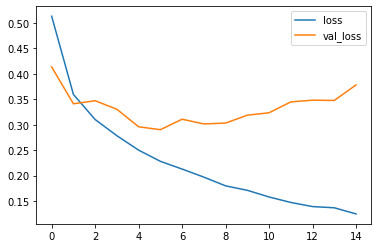

In [14]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

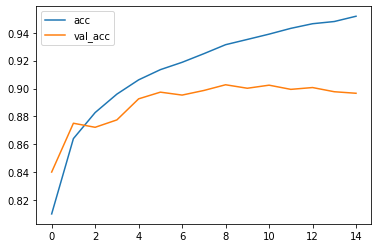

In [15]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix without  normalization
[[813   0  19  16   4   2 137   0   8   1]
 [  2 972   2  18   2   1   2   0   1   0]
 [ 10   0 855  12  46   0  75   0   2   0]
 [ 11   1  19 892  47   2  28   0   0   0]
 [  0   0  77  20 811   0  90   0   2   0]
 [  0   0   0   1   0 971   0  20   1   7]
 [ 73   0  73  25  62   1 755   0  11   0]
 [  0   0   0   0   0  10   0 965   0  25]
 [  3   0   5   3   6   4   5   3 971   0]
 [  1   0   0   0   0   5   0  33   0 961]]


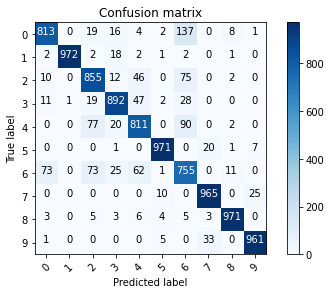

In [16]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap = plt.cm.Blues):

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix without  normalization")

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
        horizontalalignment="center",
        color = "white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


In [0]:
#Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()

Text(0.5, 1.0, 'True label: Pullover Predicted: Dress')

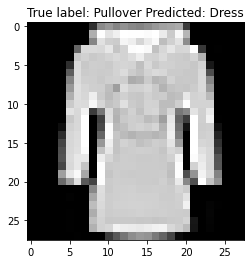

In [19]:
#Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))